In [15]:
import numpy as np
np.set_printoptions(threshold=np.nan)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Apprentissage supervisé - credit scoring

In [16]:
data = pd.read_csv('./credit_scoring.csv', sep=';', header=0)
data.head(10)

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
5,1.0,0.0,60.0,36.0,0.0,1.0,0.0,75.0,214.0,3500.0,0.0,650.0,1645.0,1
6,29.0,0.0,60.0,44.0,0.0,1.0,0.0,75.0,125.0,10000.0,0.0,1600.0,1800.0,1
7,9.0,1.0,12.0,27.0,1.0,1.0,0.0,35.0,80.0,0.0,0.0,200.0,1093.0,1
8,0.0,0.0,60.0,32.0,0.0,1.0,1.0,90.0,107.0,15000.0,0.0,1200.0,1957.0,1
9,0.0,1.0,48.0,41.0,0.0,1.0,1.0,90.0,80.0,0.0,0.0,1200.0,1468.0,0


In [17]:
print(data.shape)

(4375, 14)


Poucentage de mauvais payeurs : 27.794286
Poucentage de bon payeurs : 72.205714


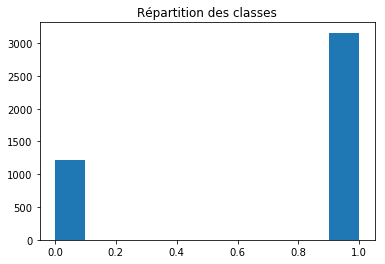

In [18]:
X = data.ix[:, 0:13].values
Y = data.ix[:, 13].values
features=data.columns[0:13]
print("Poucentage de mauvais payeurs : {0:3f}".format(100*sum(Y==0) / len(Y)))
print("Poucentage de bon payeurs : {0:3f}".format(100*sum(Y==1) / len(Y)))

plt.hist(Y)
plt.title("Répartition des classes")
plt.show()

## Découpage en apprentissage et test

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [20]:
X_test.shape

(2188, 13)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

In [22]:
def classifieur(X_train, Y_train,X_test,Y_test):
    DT=DecisionTreeClassifier(random_state=1)
    DT.fit(X_train,Y_train)
    YDT=DT.predict(X_test)
    print(confusion_matrix(Y_test,YDT))
    print("Accuracy égale à : {0:.3f}".format(accuracy_score(Y_test,YDT)))
    print("Précision égale à : {0:.3f}".format(precision_score(Y_test,YDT)))


    KNN=KNeighborsClassifier(n_neighbors=5)
    KNN.fit(X_train,Y_train)
    YKNN=KNN.predict(X_test)
    print(confusion_matrix(Y_test,YKNN))
    print("Accuracy égale à : {0:.3f}".format(accuracy_score(Y_test,YKNN)))
    print("Précision égale à : {0:.3f}".format(precision_score(Y_test,YKNN)))



In [23]:
classifieur(X_train, Y_train,X_test,Y_test)

[[ 325  279]
 [ 318 1266]]
Accuracy égale à : 0.727
Précision égale à : 0.819
[[ 189  415]
 [ 187 1397]]
Accuracy égale à : 0.725
Précision égale à : 0.771


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
sc=StandardScaler()
sc.fit(X_train)
X_train_norm=sc.transform(X_train)
X_test_norm=sc.transform(X_test)
classifieur(X_train_norm, Y_train,X_test_norm,Y_test)



[[ 324  280]
 [ 319 1265]]
Accuracy égale à : 0.726
Précision égale à : 0.819
[[ 286  318]
 [ 223 1361]]
Accuracy égale à : 0.753
Précision égale à : 0.811


In [26]:
from sklearn.decomposition import PCA

In [27]:
pca = PCA(n_components=3)
pca.fit(X_train_norm)
print(sum(pca.explained_variance_ratio_))
X_train_pca = np.concatenate((X_train_norm,pca.transform(X_train_norm)), axis=1) 
X_test_pca = np.concatenate((X_test_norm,pca.transform(X_test_norm)), axis=1)
classifieur(X_train_pca, Y_train,X_test_pca,Y_test)




0.441356271858
[[ 350  254]
 [ 321 1263]]
Accuracy égale à : 0.737
Précision égale à : 0.833
[[ 283  321]
 [ 212 1372]]
Accuracy égale à : 0.756
Précision égale à : 0.810
